In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
import pathpy as pp

In [11]:
haver_interaction = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/haversine_interaction.csv')
euclid_interaction = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/euclid_interaction.csv')
#coord = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/Pos_WTG_Brasil.csv')

In [12]:
haver_interaction.set_index('Unnamed: 0', inplace=True)
euclid_interaction.set_index('Unnamed: 0', inplace=True)

## Building the Network

if 1 then .add_edge between the two nodes (turbines) else nothing

In [22]:
haver_graph = pp.Network(directed=True)

In [23]:
cnt = 0

for row in range(0, 33):
    for turb1 in haver_interaction.iloc[[row]].index:
        for int, adj_turb in zip(haver_interaction.values[row], haver_interaction.columns):
            cnt += 1
            if int == 1:
                haver_graph.add_edge(turb1, adj_turb)
            else:
                pass

print(cnt)

1089


In [24]:
haver_graph

In [28]:
euclid_graph = pp.Network(directed=True)

In [29]:
cnt = 0

for row in range(0, 33):
    for turb1 in euclid_interaction.iloc[[row]].index:
        for int, adj_turb in zip(euclid_interaction.values[row], euclid_interaction.columns):
            cnt += 1
            if int == 1:
                euclid_graph.add_edge(turb1, adj_turb)
            else:
                pass

print(cnt)


1089


In [30]:
euclid_graph

In [31]:
print(euclid_graph)

Directed network
Nodes:				33
Links:				88



## Centrality Measures

 - Degree centrality: How many edges does a node have?
    - A node is central if it has a high degree 
    - Out degree, in-degree, or the sum of both
 - Closeness centrality: Indicates how close a node is to all other nodes in the network
    - Calculated as the average of the shortest path length from the node to every other node in the network

In [40]:
def centrality_measures(graph):
    # Calculates betweeness centrality of all nodes
    betweenness = pp.algorithms.centralities.betweenness(graph)
    # Calculates degree centrality of all nodes
    degree = pp.algorithms.centralities.degree(graph)
    # Calculates closeness centrality of all nodes
    closeness = pp.algorithms.centralities.closeness(graph)
    # . . .
    distance_matrix = pp.algorithms.centralities.distance_matrix(graph)
    # . . .
    #rank_centrality = pp.algorithms.centralities.rank_centralities(graph)

    return betweenness, degree, closeness, distance_matrix

In [70]:
def plotter(measure, name):

    df = pd.DataFrame.from_dict(
        measure, orient='index', columns=['measure'])
    
    plt.figure(figsize=(14, 7))
    plt.title(name)
    sns.barplot(x=df.index, y=df.measure)
    plt.xticks(rotation=45)
    plt.xlabel('Turbine')
    plt.ylabel('Count')

In [41]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_graph)

2022-01-10 13:47:13 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-10 13:47:13 [Severity.INFO]	Calculating closeness in network ...
2022-01-10 13:47:13 [Severity.INFO]	finished.


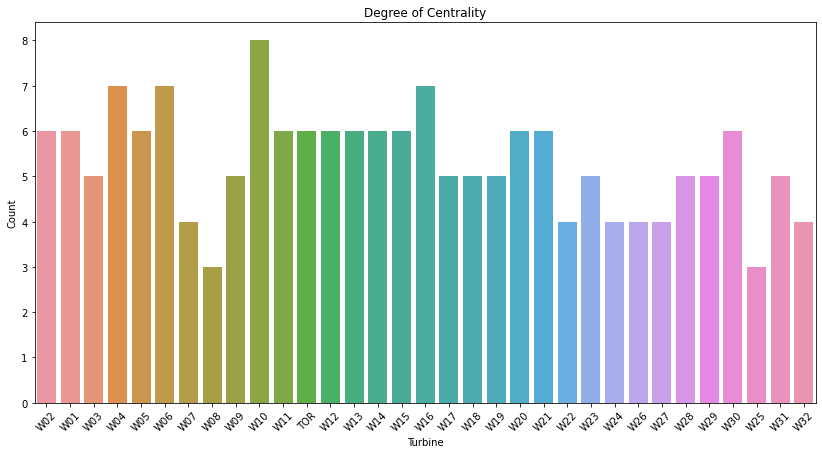

In [71]:
plotter(degree, 'Degree of Centrality')

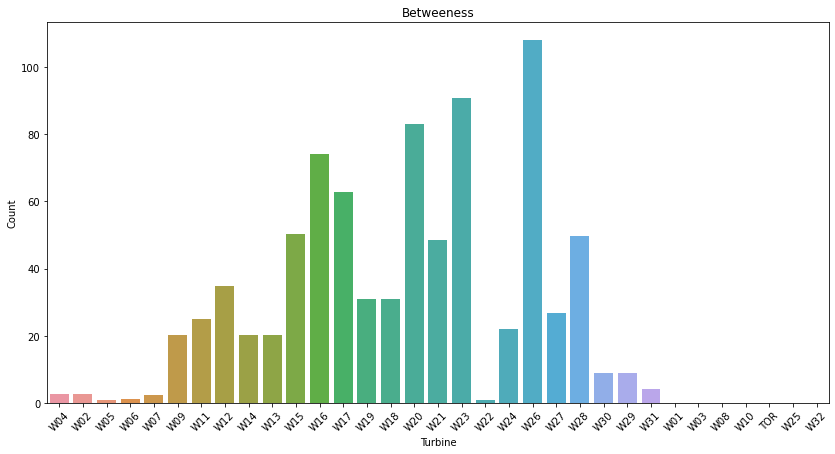

In [74]:
plotter(betweenness, 'Betweeness')

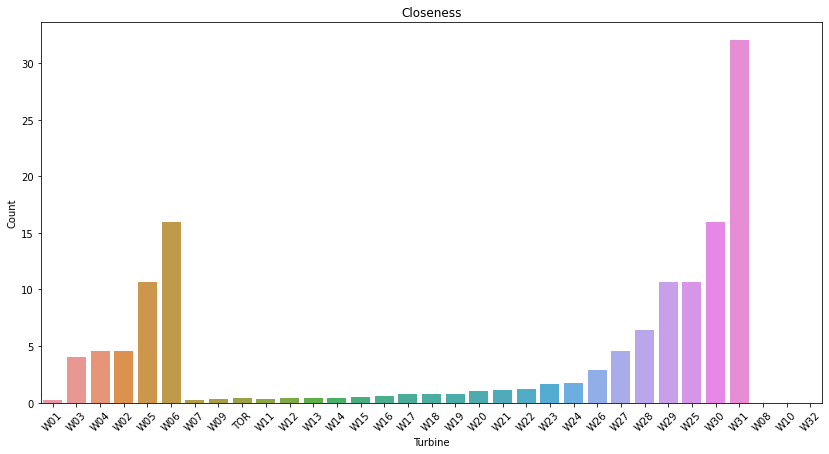

In [75]:
plotter(closeness, 'Closeness')

In [78]:
print(f"Avg degree: {pp.statistics.mean_degree(euclid_graph, degree='indegree')}")
print(f"Avg degree: {pp.statistics.mean_degree(euclid_graph, degree='outdegree')}")

Avg degree: 2.6666666666666665
Avg degree: 2.6666666666666665


In [43]:
# Haversine Distances
betweenness_h, degree_h, closeness_h, distance_matrix_h = centrality_measures(haver_graph)

2022-01-10 13:48:04 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-10 13:48:04 [Severity.INFO]	Calculating closeness in network ...
2022-01-10 13:48:04 [Severity.INFO]	finished.


In [51]:
print(f"Avg degree: {pp.statistics.mean_degree(haver_graph, degree='indegree')}")

Avg degree: 6.787878787878788


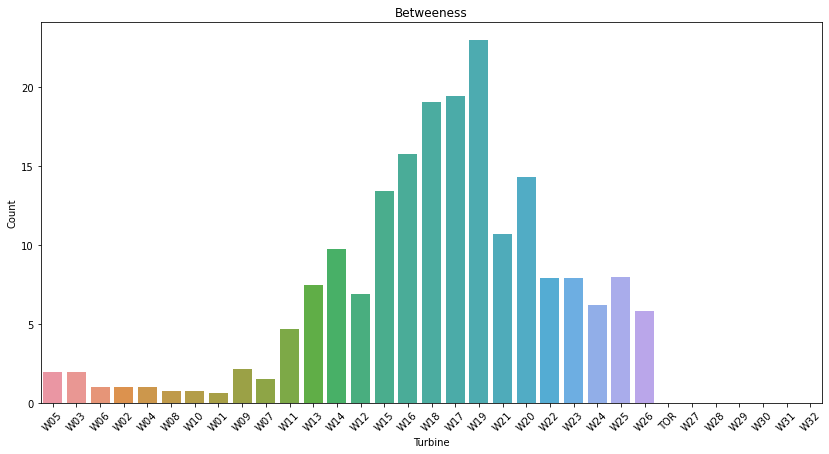

In [73]:
plotter(betweenness_h, 'Betweeness')

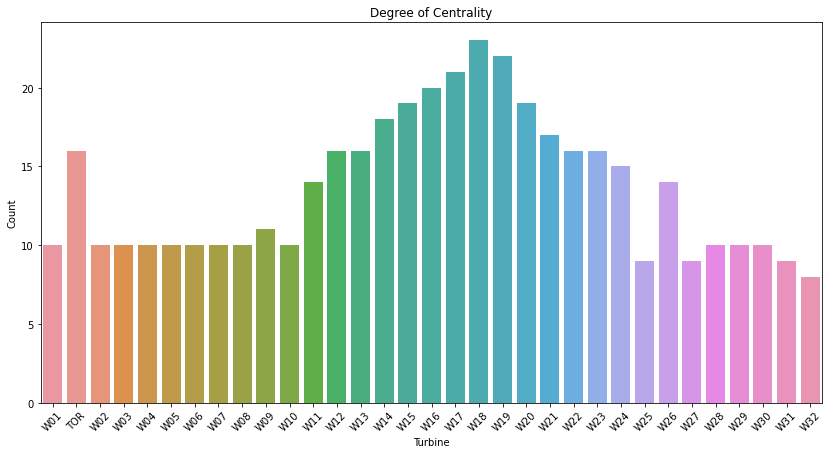

In [72]:
plotter(degree_h, 'Degree of Centrality')

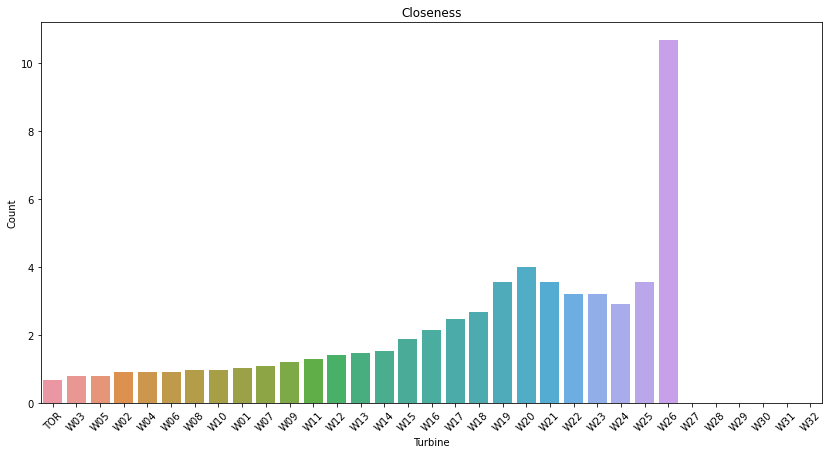

In [77]:
plotter(closeness_h, 'Closeness')